# Learn Production
A simple deep-learning model built using Keras and TensorFlow that learns to calculate the product of two numbers.

# Import Libraries

In [13]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Generate our dataset
Because we focus on two number production, we'll build a Panda's DataFrame which consists of two (random) columns and 
a lot of rows (the more samples the higher learning rate).
Note: At the first stage, we just rely on integers which can be developed on decimals later.

# Generate synthetic data

In [14]:
np.random.seed(2) # Recommanded for Debugging
x1 = np.random.randint(1, 100, 10000)  # First number
x2 = np.random.randint(1, 100, 10000)  # Second number
y = x1 * x2                            # Target: Multiplication
df = pd.DataFrame({"num1": x1, "num2": x2, "res": y})
df

,num1,num2,res
0,41,51,2091
1,16,51,816
2,73,29,2117
3,23,92,2116
4,44,44,1936
...,...,...,...
9995,21,55,1155
9996,26,82,2132
9997,61,71,4331
9998,61,16,976


# Normalization

In [17]:

# Splitting (train and test sets)
train_size = int(0.8 * 10000)
x_train, x_test = df[["num1", "num2"]].iloc[:train_size], df[["num1", "num2"]].iloc[train_size:]
y_train, y_test = df["res"].iloc[:train_size], df["res"].iloc[train_size:]

# Normalizing
x_train, x_test = x_train / 100.0, x_test / 100.0
print(f"Dataset Shape:\nX train: {x_train.shape}\nY train: {y_train.shape}\nX test: {x_test.shape}\nY test: {y_test.shape}")

Dataset Shape:
X train: (8000, 2)
Y train: (8000,)
X test: (2000, 2)
Y test: (2000,)


In [29]:
Pmodel = keras.Sequential([
    layers.InputLayer(input_shape=(2,)),
    layers.Dense(256, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1)  
])

Pmodel.compile(optimizer="adam", loss="mse", metrics=["mae"])
log = Pmodel.fit(x_train, y_train, epochs=200, batch_size=16, validation_split=0.2, verbose=1)

Epoch 1/200


c:\Users\Novin\.conda\envs\hamta2\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7429334.5000 - mae: 1967.1357 - val_loss: 1259837.6250 - val_mae: 862.3199
Epoch 2/200
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 747077.3750 - mae: 630.3748 - val_loss: 227604.6250 - val_mae: 374.1558
Epoch 3/200
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 207737.1250 - mae: 361.7459 - val_loss: 202675.7656 - val_mae: 359.0453
Epoch 4/200
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 182065.6562 - mae: 333.9633 - val_loss: 177426.4844 - val_mae: 316.5667
Epoch 5/200
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 150730.6094 - mae: 294.9872 - val_loss: 37746.4961 - val_mae: 151.4675
Epoch 6/200
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 21775.8770 - mae: 114.2660 - val_loss: 4951.8940 - val_mae: 53.5940
Epoch 7/200
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3612.3491 - mae: 43.7838 - val_loss: 1076.3555 - val_mae: 22.6567
Epoch 8/200
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 853.7333 - mae: 20.8441 - va

# Prediction

In [30]:
test_cases = np.array([[12, 8], [50, 20], [75, 4], [99, 100], [2, 20], [10, 10]]) / 100.0
predictions = Pmodel.predict(test_cases).flatten()

pd.DataFrame({'num1':test_cases[:, 0]*100, 'num2':test_cases[:, 1]*100, 'Actual Production':(test_cases*100).prod(axis=1), 'Our prediction':np.round(predictions)})

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


,num1,num2,Actual Production,Our prediction
0,12.0,8.0,96.0,91.0
1,50.0,20.0,1000.0,999.0
2,75.0,4.0,300.0,292.0
3,99.0,100.0,9900.0,9870.0
4,2.0,20.0,40.0,41.0
5,10.0,10.0,100.0,101.0


# Its performance

<Axes: xlabel='Epochs', ylabel='MAE values'>

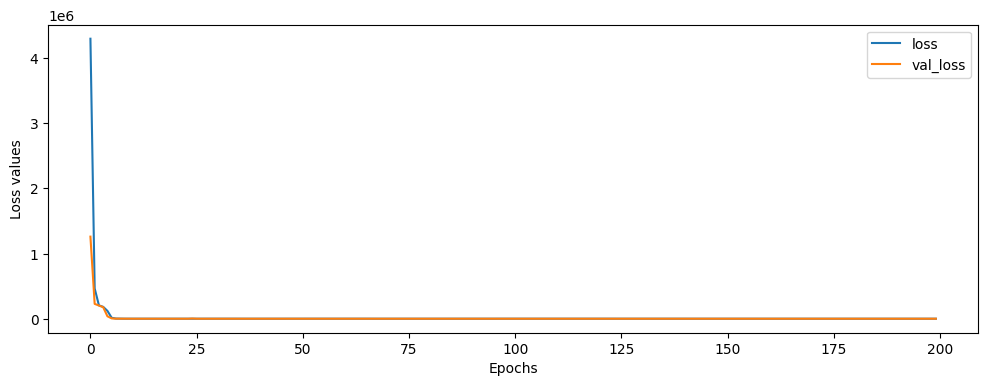

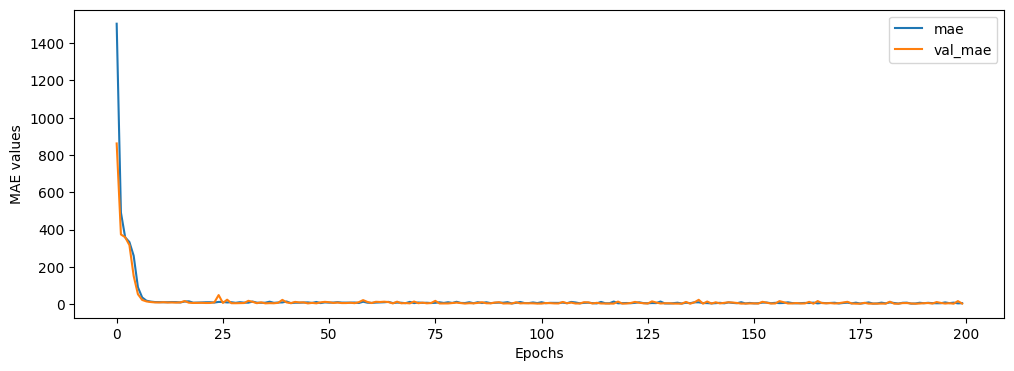

In [36]:
e = pd.DataFrame(log.history)
e[['loss', 'val_loss']].plot(kind='line', xlabel = 'Epochs', ylabel = 'Loss values', figsize=(12, 4))
e[['mae', 'val_mae']].plot(kind='line', xlabel = 'Epochs', ylabel = 'MAE values', figsize=(12, 4))

# Correlation Curve (Pred vs. Actual)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step


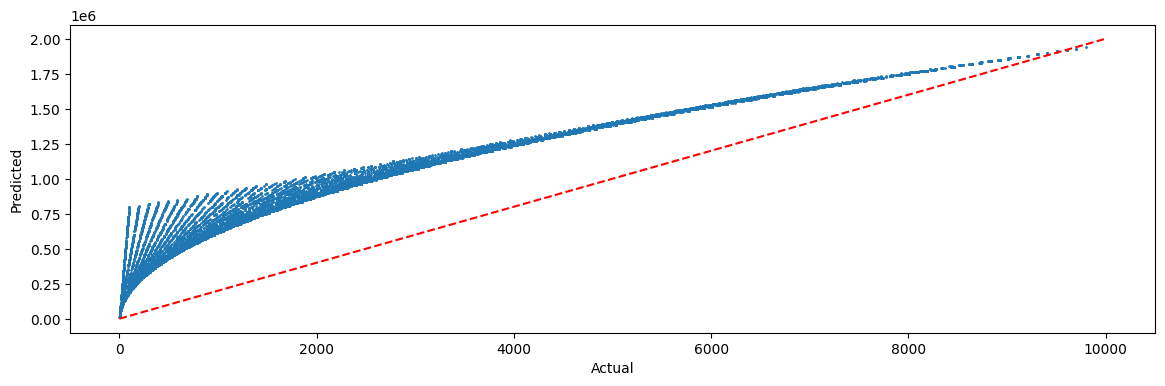

In [50]:
plt.figure(figsize=(14, 4))
plt.scatter(df['res'].to_numpy(), np.round(Pmodel.predict(df[['num1', 'num2']].to_numpy())), s = 1)
plt.plot([0, 10000], [0, 2000000], linestyle='--', c = 'r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()